<a href="https://colab.research.google.com/github/anoozhka/NLP-Projects/blob/main/Comment_Toxicity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install tensorflow pandas matplotlib sklearn
import os
import pandas as pd
import tensorflow as tf
import numpy as np
from tensorflow.keras.layers import TextVectorization, LSTM, Dropout, Bidirectional, Dense, Embedding
from tensorflow.keras.models import Sequential
from tensorflow.keras.metrics import Precision, Recall, CategoricalAccuracy

# Load Data
df = pd.read_csv("train.csv")

# Preprocess
X = df['comment_text']
y = df[df.columns[2:]].values
MAX_FEATURES = 200000
vectorizer = TextVectorization(max_tokens=MAX_FEATURES, output_sequence_length=1800, output_mode='int')
vectorizer.adapt(X.values)
vectorized_text = vectorizer(X.values)
dataset = tf.data.Dataset.from_tensor_slices((vectorized_text, y))
dataset = dataset.cache().shuffle(160000).batch(16).prefetch(8)
train = dataset.take(int(len(dataset)*.7))
val = dataset.skip(int(len(dataset)*.7)).take(int(len(dataset)*.2))
test = dataset.skip(int(len(dataset)*.9)).take(int(len(dataset)*.1))

# Create Model
model = Sequential()
model.add(Embedding(MAX_FEATURES+1, 32))
model.add(Bidirectional(LSTM(32, activation='tanh')))
model.add(Dense(128, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(6, activation='sigmoid'))
model.compile(loss='BinaryCrossentropy', optimizer='Adam')

# Train Model
history = model.fit(train, epochs=1, validation_data=val)

  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.
6981/6981 [==============================] - 854s 121ms/step - loss: 0.0618 - val_loss: 0.0460


In [3]:
# Make Predictions
input_text = vectorizer('You freaking suck! I am going to hit you.')
input_text = np.expand_dims(input_text, axis=0)
res = (model.predict(input_text) > 0.5).astype(int)
print(res)

1/1 [==============================] - 1s 1s/step
[[1 0 1 0 1 0]]


In [4]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Evaluate Model
y_true_all = []
y_pred_all = []

for batch in test.as_numpy_iterator():
    X_true, y_true = batch
    yhat = model.predict(X_true)

    y_true = y_true.flatten()
    yhat = (yhat > 0.5).astype(int).flatten()  # convert probabilities to binary predictions

    y_true_all.extend(y_true)
    y_pred_all.extend(yhat)

# Using scikit-learn metrics
accuracy = accuracy_score(y_true_all, y_pred_all)
precision = precision_score(y_true_all, y_pred_all, average='micro')
recall = recall_score(y_true_all, y_pred_all, average='micro')
f1 = f1_score(y_true_all, y_pred_all, average='micro')

print(f'Accuracy: {accuracy}, Precision: {precision}, Recall: {recall}, F1-score: {f1}')


1/1 [==============================] - 0s 86ms/step
Accuracy: 0.9831264627214978, Precision: 0.9831264627214978, Recall: 0.9831264627214978, F1-score: 0.9831264627214978


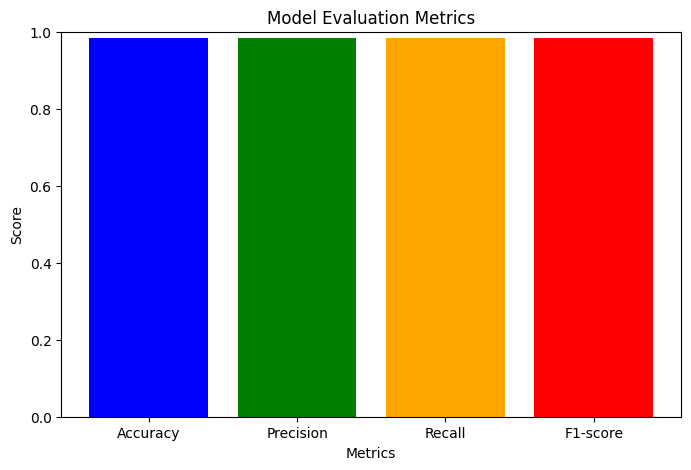

In [5]:
import matplotlib.pyplot as plt

# Assuming you have computed accuracy, precision, recall, and f1 as mentioned in the previous code

# Metrics
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-score']
values = [accuracy, precision, recall, f1]

# Plotting
plt.figure(figsize=(8, 5))
plt.bar(metrics, values, color=['blue', 'green', 'orange', 'red'])
plt.title('Model Evaluation Metrics')
plt.xlabel('Metrics')
plt.ylabel('Score')
plt.ylim([0, 1])  # Assuming all metrics are between 0 and 1
plt.show()


In [6]:
# Evaluate Model
pre = Precision()
re = Recall()
acc = CategoricalAccuracy()
for batch in test.as_numpy_iterator():
    X_true, y_true = batch
    yhat = model.predict(X_true)
    y_true = y_true.flatten()
    yhat = yhat.flatten()
    pre.update_state(y_true, yhat)
    re.update_state(y_true, yhat)
    acc.update_state(y_true, yhat)
print(f'Precision: {pre.result().numpy()}, Recall:{re.result().numpy()}, Accuracy:{acc.result().numpy()}')

1/1 [==============================] - 0s 75ms/step
Precision: 0.8598901033401489, Recall:0.6281536817550659, Accuracy:0.47943830490112305


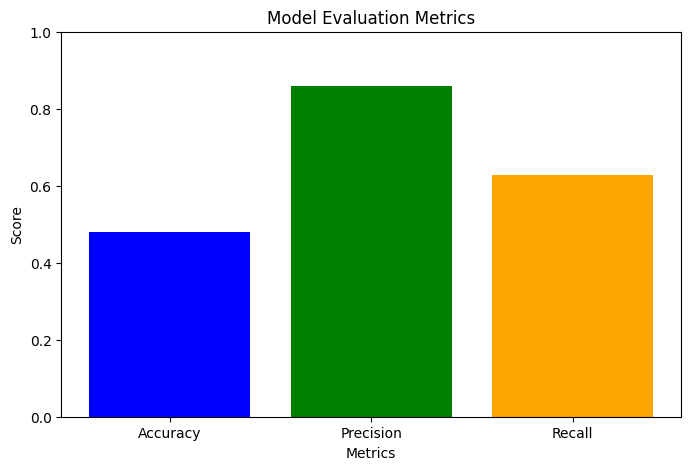

In [7]:
import matplotlib.pyplot as plt
# Metrics
metrics = ['Accuracy', 'Precision', 'Recall']
values = [acc.result().numpy(), pre.result().numpy(), re.result().numpy()]

# Plotting
plt.figure(figsize=(8, 5)
)
plt.bar(metrics, values, color=['blue', 'green', 'orange'])
plt.title('Model Evaluation Metrics')
plt.xlabel('Metrics')
plt.ylabel('Score')
plt.ylim([0, 1])  # Assuming all metrics are between 0 and 1
plt.show()


In [8]:
!pip install gradio jinja2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 61.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.0/92.0 kB 13.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 315.9/315.9 kB 36.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 11.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 142.5/142.5 kB 19.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 106.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.2/47.2 kB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.8/60.8 kB 9.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 20.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 13.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 11.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.9/71.9 kB 12.4 M

In [9]:
import tensorflow as tf
import gradio as gr
model.save('toxicity.h5')
model = tf.keras.models.load_model('toxicity.h5')
input_str = vectorizer('hey i freaken hate you!')

res = model.predict(np.expand_dims(input_str,0))
res

def score_comment(comment):
    vectorized_comment = vectorizer([comment])
    results = model.predict(vectorized_comment)

    text = ''
    for idx, col in enumerate(df.columns[2:]):
        text += '{}: {}\n'.format(col, results[0][idx]>0.5)

    return text
interface = gr.Interface(fn=score_comment,
                         inputs = gr.Textbox(lines=2, placeholder='Comment to score'),
                        outputs='text')
interface.launch(share=True)

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1/1 [==============================] - 1s 690ms/step
Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://3ece2d0fcac74da9e5.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)
